In [2]:
import torch
from torch import nn
##nn contains all the bulding blocks required to build a neural network
import matplotlib.pyplot as plt

##### TYPES OF DATA THAT WE ENCOUNTER

- excel data or tabular data
- Image data
- video data
- Text data  
- Audio data
- DNA data


##### MACHINE LEARNING CONSISTS OF TWO PARTS  

- modify the data to numerical representation as machine learning models can work only on numbers.
- create the model to find the patterns that gives representation of the data  


##### we will use linear equation of  line  to create data and find patterns

` Y = mX + C `

In [3]:
### creating known parameters
weight=0.6
bias =0.09

### creating the data
start=0
end=1
step=0.02

x=torch.arange(start,end,step).unsqueeze(dim=1)
y= (weight*x)+bias

x,y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.0900],
         [0.1020],
         [

In [4]:
x.shape,y.shape,len(x),len(y)

(torch.Size([50, 1]), torch.Size([50, 1]), 50, 50)

In [5]:
#splitting the data into train and test 80:20 split
train_size=int(0.8*len(x))
x_train=x[:train_size]
x_test=x[train_size:]
x_train.shape,x_test.shape

(torch.Size([40, 1]), torch.Size([10, 1]))

In [6]:
#similarly spitting y into train and test
y_train=y[:train_size]
y_test=y[train_size:]
y_train.shape,y_test.shape

(torch.Size([40, 1]), torch.Size([10, 1]))

In [7]:
## creating a function to plot training data,testing data and predictions

def plot_data(train_data=x_train,train_labels=y_train,test_data=x_test,test_labels=y_test,predictions=None):
  """plots training data,test,data and compares predicions"""
  plt.figure(figsize=(10,7))


  #plotting train_data
  plt.scatter(train_data,train_labels,s=10,c="b",label="training_data")

  #plotting test data
  plt.scatter(test_data,test_labels,s=10,c="g",label="test_data")

  #plotting predictions
  if predictions is not None:
    plt.scatter(test_data,predictions,s=10,c="r",label="predictions")

  #show the legend
  plt.legend(prop={"size":14})



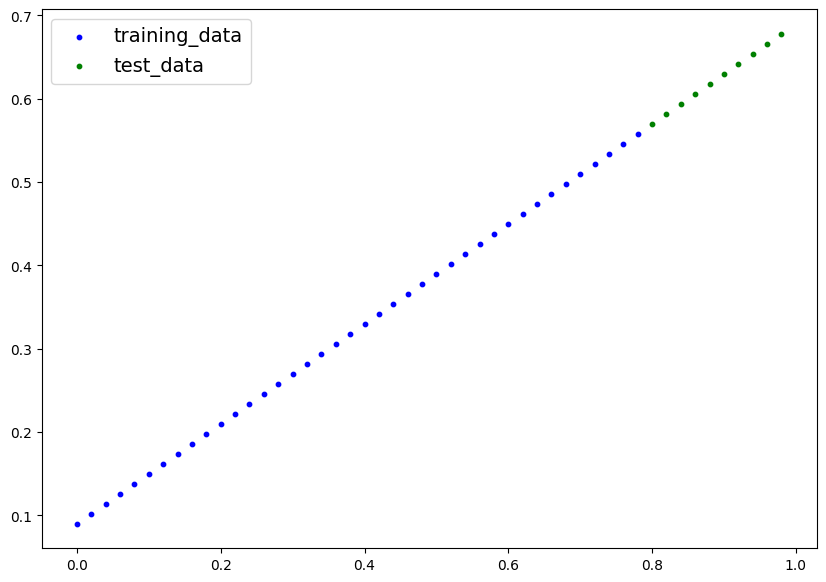

In [8]:
plot_data()

### PyTorch model building essentials
PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are torch.nn, torch.optim, torch.utils.data.Dataset and torch.utils.data.DataLoader.

PyTorch module	What does it do?
- torch.nn-	Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).
torch.nn.Parameter	Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".
torch.nn.Module	The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.

- torch.optim	Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).

- def forward()	All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).Whenever we create subclass of nn module we have to override forward() function.


- nn.Module contains the larger building blocks (layers)
nn.Parameter contains the smaller parameters like weights and biases (put these together to make nn.Module(s))
- forward() tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)
- torch.optim contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data

### Build model
Now we've got some data, let's build a model to use the blue dots to predict the green dots.


Let's replicate a standard linear regression model using pure PyTorch.

In [9]:
#create a linear regression model class
class LinearRegressionModel(nn.Module):
   # <- almost everything in PyTorch is a nn.Module
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.rand(1,dtype=torch.float),requires_grad=True) # <- start with random weights (this will get adjusted as the model learns)
    # <- PyTorch loves float32 by default
    # <- can we update this value with gradient descent?)
    self.bias=nn.Parameter(torch.rand(1,dtype=torch.float),requires_grad=True) # <- start with random bias (this will get adjusted as the model learns)
    # <- PyTorch loves float32 by default
    # <- can we update this value with gradient descent?)
    ##REQUIRES GRAD IS TRUE BY DEFAULT

  #forward function should be overwritten,it is used for forward computations
  ## xi is the input data that is training testing features
  def forward(self,x:torch.tensor):
    return self.weight*x + self.bias ###this linear regression formula



learn more about OOPs https://realpython.com/python3-object-oriented-programming/

### Checking the contents of PyTorch Model

- with the help of model.parameter()
- with the help of model.state_dict()

In [10]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [11]:
#with the help of model.state_dict()
model_0.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

### Making predictions using torch.inference_mode()

To check this we can pass it the test data X_test to see how closely it predicts y_test.

When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've defined.


As the name suggests, torch.inference_mode() is used when using a model for inference (making predictions).

torch.inference_mode() turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make forward-passes (data going through the forward() method) faster.

Note: In older PyTorch code, you may also see torch.no_grad() being used for inference. While torch.inference_mode() and torch.no_grad() do similar things, torch.inference_mode() is newer, potentially faster and preferred.

In [12]:
#making predictions with torch.inference_mode
with torch.inference_mode():
  pred=model_0(x_test)


# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

pred

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [13]:
###original predictions
y_test

tensor([[0.5700],
        [0.5820],
        [0.5940],
        [0.6060],
        [0.6180],
        [0.6300],
        [0.6420],
        [0.6540],
        [0.6660],
        [0.6780]])

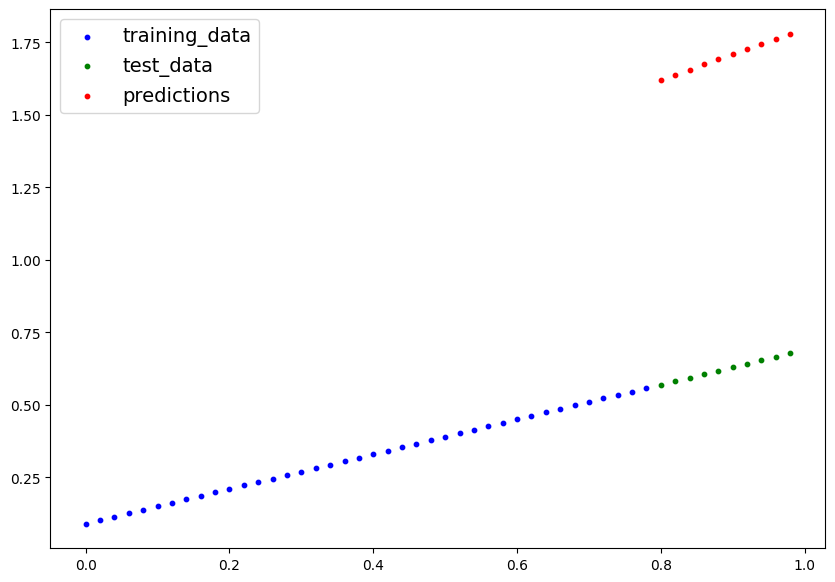

In [14]:
### plotting the prediction and actual values

plot_data(predictions=pred)

Since we have used random weight and bias it is giving very bad prediction,so here we will utilise loss function to calculate loss and compare it with actual predictions to train the model.

### Train model
Right now our model is making predictions using random parameters to make calculations, it's basically guessing (randomly).

To fix that, we can update its internal parameters (I also refer to parameters as patterns), the weights and bias values we set randomly using nn.Parameter() and torch.randn() to be something that better represents the data.



#### Creating a loss function and optimizer in PyTorch
For our model to update its parameters on its own, we'll need to add a few more things .

And that's a loss function as well as an optimizer.


- - Loss function	Measures how wrong your models predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). Lower the better.	PyTorch has plenty of built-in loss functions in torch.nn.	Mean absolute error (MAE) for regression problems (torch.nn.L1Loss()). Binary cross entropy for binary classification problems (torch.nn.BCELoss()).

- Optimizer	Tells your model how to update its internal parameters to best lower the loss.	You can find various optimization function implementations in torch.optim.	Stochastic gradient descent (torch.optim.SGD()). Adam optimizer (torch.optim.Adam()).


Depending on what kind of problem you're working on will depend on what loss function and what optimizer you use.

However, there are some common values, that are known to work well such as the SGD (stochastic gradient descent) or Adam optimizer. And the MAE (mean absolute error) loss function for regression problems (predicting a number) or binary cross entropy loss function for classification problems (predicting one thing or another).

For our problem, since we're predicting a number, let's use MAE (which is under torch.nn.L1Loss()) in PyTorch as our loss function.

And we'll use SGD, torch.optim.SGD(params, lr) where:

params is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before).
lr is the learning rate you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a hyperparameter (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called learning rate scheduling).

In [15]:
#create the loss function
loss_func=nn.L1Loss()#----same as MAE Loss


# create the optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),#parameters of the model to be optimized
                          lr=0.01)#--learning rate)


### Creating an optimization loop in PyTorch
Woohoo! Now we've got a loss function and an optimizer, it's now time to create a training loop (and testing loop).

The training loop involves the model going through the training data and learning the relationships between the features and labels.



### PyTorch training loop
For the training loop, we'll build the following steps:


- 1	- Forward pass	: The model goes through all of the training data once, performing its forward() function calculations.	`model(x_train)`  
- 2	- :Calculate the loss	The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.	`loss = loss_fn(y_pred, y_train)`  
- 3- :	Zero gradients	The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step.	`optimizer.zero_grad()`  
- 4-:	Perform backpropagation on the loss	Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards".	`loss.backward()`    
- 5- :Update the optimizer (gradient descent)	Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them.	`optimizer.step()`


### PyTorch testing loop
As for the testing loop (evaluating our model), the typical steps include:

Number	Step name	What does it do?	Code example
- 1- :	Forward pass	The model goes through all of the training data once, performing its forward() function calculations.`model(x_test)`
- 2- :	Calculate the loss	The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.	`loss = loss_fn(y_pred, y_test)`
- 3- :	Calulate evaluation metrics (optional)	Alongisde the loss value you may want to calculate other evaluation metrics such as accuracy on the test set.  
  
Notice the testing loop doesn't contain performing backpropagation (loss.backward()) or stepping the optimizer (optimizer.step()), this is because no parameters in the model are being changed during testing, they've already been calculated. For testing, we're only interested in the output of the forward pass through the model.

In [16]:
torch.manual_seed(42)

#setting the number of epochs  i.e how many times model will pass over the training data
epochs=200

#creating empty list to track down values
number_of_epochs=[]
train_loss_values=[]
test_loss_values=[]

##Training
for epoch in range(epochs):

  #put the model on training mode(this is the default mode)
  model_0.train()

  ##applying forward pass on the train data using forward method (inside)
  train_pred=model_0(x_train)

  ##calculate the loss(how diffrent is predictions from ground truth)
  train_loss=loss_func(train_pred,y_train)

  ##zero grad of optimizer
  optimizer.zero_grad()

  ##backward propogation
  train_loss.backward()

  ##stepping the optimizer
  optimizer.step()


  ##Testing ---Putting the model in evaluation mode
  with torch.inference_mode():
    model_0.eval()

    ##forward pass
    test_pred=model_0(x_test)

    #test_lost
    test_loss=loss_func(test_pred,y_test)


  #checking for every 10th epoch
  if epoch%10==0:
    number_of_epochs.append(epoch)
    train_loss_values.append(train_loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    ## we got this error with matplotlib  " RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead." so we converted the loss to array for plotting

    ##printing how the training and evaluation is going on
    print(f"Epoch : {epoch}  train_loss  : {train_loss}   test_lost  {test_loss}")
    print(model_0.state_dict())




Epoch : 0  train_loss  : 0.9350889325141907   test_lost  1.0627527236938477
OrderedDict([('weight', tensor([0.8784])), ('bias', tensor([0.9050]))])
Epoch : 10  train_loss  : 0.8198790550231934   test_lost  0.9280427694320679
OrderedDict([('weight', tensor([0.8394])), ('bias', tensor([0.8050]))])
Epoch : 20  train_loss  : 0.704669177532196   test_lost  0.7933329343795776
OrderedDict([('weight', tensor([0.8004])), ('bias', tensor([0.7050]))])
Epoch : 30  train_loss  : 0.5894594192504883   test_lost  0.6586230993270874
OrderedDict([('weight', tensor([0.7614])), ('bias', tensor([0.6050]))])
Epoch : 40  train_loss  : 0.4742494523525238   test_lost  0.5239132642745972
OrderedDict([('weight', tensor([0.7224])), ('bias', tensor([0.5050]))])
Epoch : 50  train_loss  : 0.3590396046638489   test_lost  0.3892034590244293
OrderedDict([('weight', tensor([0.6834])), ('bias', tensor([0.4050]))])
Epoch : 60  train_loss  : 0.24382972717285156   test_lost  0.2544935643672943
OrderedDict([('weight', tensor

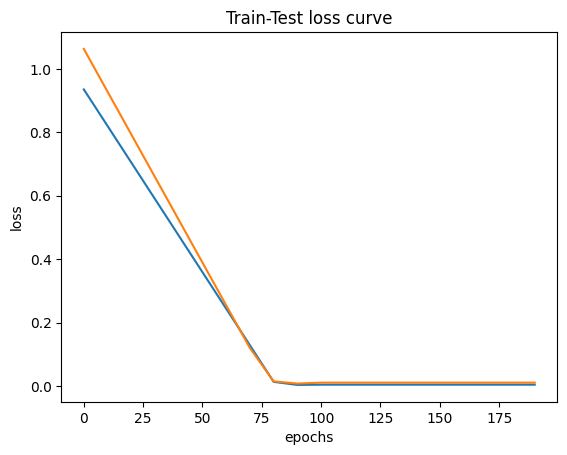

In [17]:
##visualizing training loss and test loss over number of epochs

plt.plot(number_of_epochs,train_loss_values,label="train loss")
plt.plot(number_of_epochs,test_loss_values,label="test loss")
plt.title("Train-Test loss curve")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [18]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weight', tensor([0.5961])), ('bias', tensor([0.0960]))])

And the original values for weights and bias are:
weights: 0.6, bias: 0.09


In [19]:
### making predictions with our model
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # x_test = x_test.to(device)
  y_preds = model_0(x_test)
y_preds

tensor([[0.5729],
        [0.5848],
        [0.5968],
        [0.6087],
        [0.6206],
        [0.6325],
        [0.6444],
        [0.6564],
        [0.6683],
        [0.6802]])

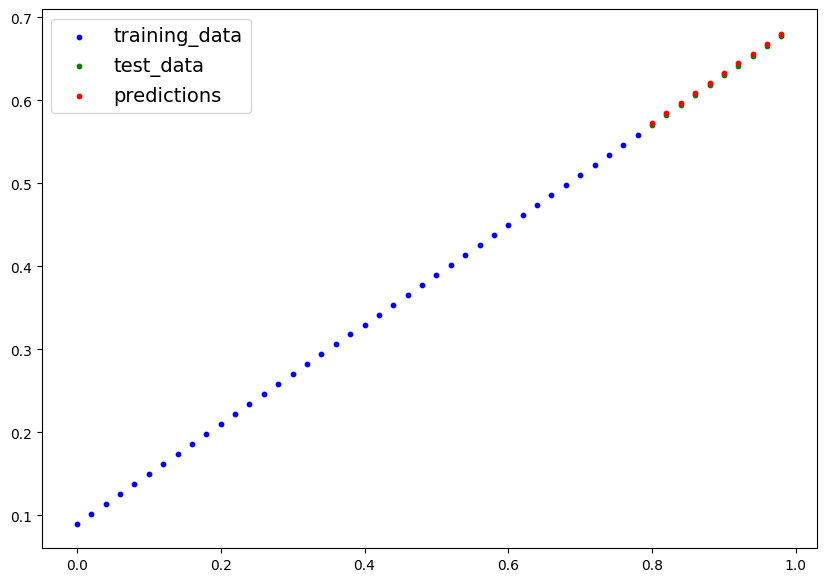

In [20]:
plot_data(predictions=y_preds)

### SAVING AND LOADING A MODEL

- There are basically three methods to save and load the model


- torch.save :	Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.
- torch.load	: Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).
- torch.nn.Module.load_state_dict	: Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.  



#### The recommended way for saving and loading a model for inference (making predictions) is by saving and loading a model's state_dict().



- We'll create a directory for saving models to called models using Python's pathlib module.
- We'll create a file path to save the model to.
- We'll call torch.save(obj, f) where obj is the target model's state_dict() and f is the filename of where to save the model.  



Note: It's common convention for PyTorch saved models or objects to end with .pt or .pth, like saved_model_01.pth.

In [21]:
#saving the pytorch model
from pathlib import Path

#create models directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)


## creating models save path
MODEL_NAME="03_pytorch_workflow_model_0.pth"##models should have .pth extension
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME


##save the model state dict
print("saving model to : ",MODEL_SAVE_PATH)

torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

saving model to :  models/03_pytorch_workflow_model_0.pth


In [22]:
ls-l models


total 4
-rw-r--r-- 1 root root 1680 Mar 12 01:07 03_pytorch_workflow_model_0.pth


### LOADING THE SAVED MODEL

Loading a saved PyTorch model's state_dict()
Since we've now got a saved model state_dict() at models/01_pytorch_workflow_model_0.pth we can now load it in using torch.nn.Module.load_state_dict(torch.load(f)) where f is the filepath of our saved model state_dict().

Why call torch.load() inside torch.nn.Module.load_state_dict()?

Because we only saved the model's state_dict() which is a dictionary of learned parameters and not the entire model, we first have to load the state_dict() with torch.load() and then pass that state_dict() to a new instance of our model (which is a subclass of nn.Module).

Why not save the entire model?

Saving the entire model rather than just the state_dict() is more intuitive, however, to quote the PyTorch documentation (italics mine):

The disadvantage of this approach (saving the whole model) is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved...

Because of this, our code can break in various ways when used in other projects or after refactors.

So instead, we're using the flexible method of saving and loading just the state_dict(), which again is basically a dictionary of model parameters.

Let's test it out by created another instance of LinearRegressionModel(), which is a subclass of torch.nn.Module and will hence have the in-built method load_state_dict().

In [24]:
## instantiate a new instance of our model ,this will be instantitaed with random weights
loaded_model_0=LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [26]:
# 1. Putting the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Using the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(x_test) # perform a forward pass on the test data with the loaded model

In [27]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

It looks like the loaded model predictions are the same as the previous model predictions (predictions made prior to saving). This indicates our model is saving and loading as expected.

### SUMMARIZING

In [28]:
import matplotlib.pyplot as plt
import torch
from torch import nn
torch.__version__

'2.1.0+cu121'

In [30]:
##setting device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print("Using device : ",device)

Using device :  cpu


### CREATING DATA AND SPLITTING INTO TRAIN AND TEST

In [53]:
### creating some data using linear regrssion formula y=weights*x + bias
weight=0.8
bias=0.1

##creating x and y
x=torch.arange(0,1,0.02).unsqueeze(dim=1)
y=weight*x + bias

x,y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.1000],
         [0.1160],
         [

In [54]:
##splitting the data into train and test
train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]

len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

In [55]:
## creating a function to plot training data,testing data and predictions

def plot_data(train_data=x_train,train_labels=y_train,test_data=x_test,test_labels=y_test,predictions=None):
  """plots training data,test,data and compares predicions"""
  plt.figure(figsize=(10,7))


  #plotting train_data
  plt.scatter(train_data,train_labels,s=10,c="b",label="training_data")

  #plotting test data
  plt.scatter(test_data,test_labels,s=10,c="g",label="test_data")

  #plotting predictions
  if predictions is not None:
    plt.scatter(test_data,predictions,s=10,c="r",label="predictions")

  #show the legend
  plt.legend(prop={"size":14})


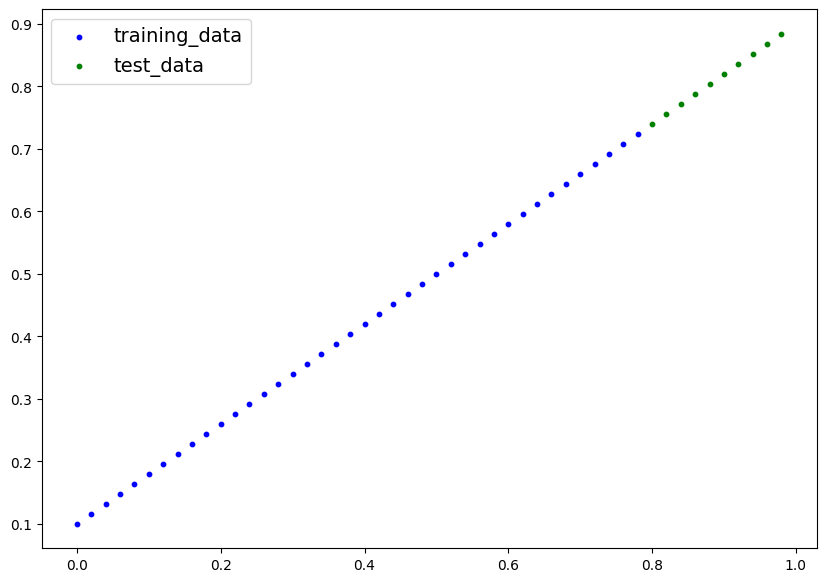

In [56]:
plot_data()

### BUILDING A PYTORCH MODEL  

We'll create the same style of model as before except this time, instead of defining the weight and bias parameters of our model manually using nn.Parameter(), we'll use nn.Linear(in_features, out_features) to do it for us.

Where in_features is the number of dimensions your input data has and out_features is the number of dimensions you'd like it to be output to.

In our case, both of these are 1 since our data has 1 input feature (X) per label (y).

In [57]:
##subclass nn module to make our model
class LinearRegressionModel2(nn.Module):
  def __init__(self):
    super().__init__()
    ##using nn.linear for creating models parameters
    self.Linear_Layer=nn.Linear(in_features=1,out_features=1)


  ###definingvthe forward computations
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.Linear_Layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModel2()
model_1, model_1.state_dict()

(LinearRegressionModel2(
   (Linear_Layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('Linear_Layer.weight', tensor([[0.7645]])),
              ('Linear_Layer.bias', tensor([0.8300]))]))

In [58]:
##check the modls current device
next(model_1.parameters()).device

device(type='cpu')

In [59]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cpu')

In [60]:
##setting loss function
loss_func=nn.L1Loss()

##setting optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)


### TRAINING

In [62]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, error will happen (not all model/data on device)
x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(x_train)

    # 2. Calculate loss
    loss = loss_func(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(x_test)

        # 2. Calculate the loss
        test_loss = loss_func(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.7161778807640076 | Test loss: 0.6849762201309204
Epoch: 100 | Train loss: 0.04098118096590042 | Test loss: 0.09487911313772202
Epoch: 200 | Train loss: 0.006639957427978516 | Test loss: 0.014901936054229736
Epoch: 300 | Train loss: 0.007208128925412893 | Test loss: 0.001497757388278842
Epoch: 400 | Train loss: 0.007208128925412893 | Test loss: 0.001497757388278842
Epoch: 500 | Train loss: 0.007208128925412893 | Test loss: 0.001497757388278842
Epoch: 600 | Train loss: 0.007208128925412893 | Test loss: 0.001497757388278842
Epoch: 700 | Train loss: 0.007208128925412893 | Test loss: 0.001497757388278842
Epoch: 800 | Train loss: 0.007208128925412893 | Test loss: 0.001497757388278842
Epoch: 900 | Train loss: 0.007208128925412893 | Test loss: 0.001497757388278842


In [63]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('Linear_Layer.weight', tensor([[0.7905]])),
             ('Linear_Layer.bias', tensor([0.0965]))])

And the original values for weights and bias are:
weights: 0.8, bias: 0.1


In [64]:
##Making Predictions
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(x_test)
y_preds

tensor([[0.7289],
        [0.7447],
        [0.7605],
        [0.7763],
        [0.7921],
        [0.8079],
        [0.8237],
        [0.8396],
        [0.8554],
        [0.8712]])

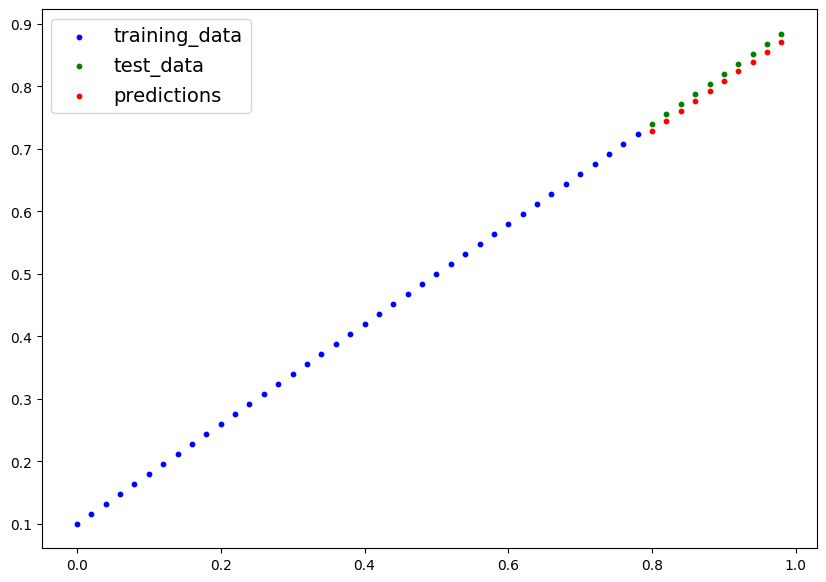

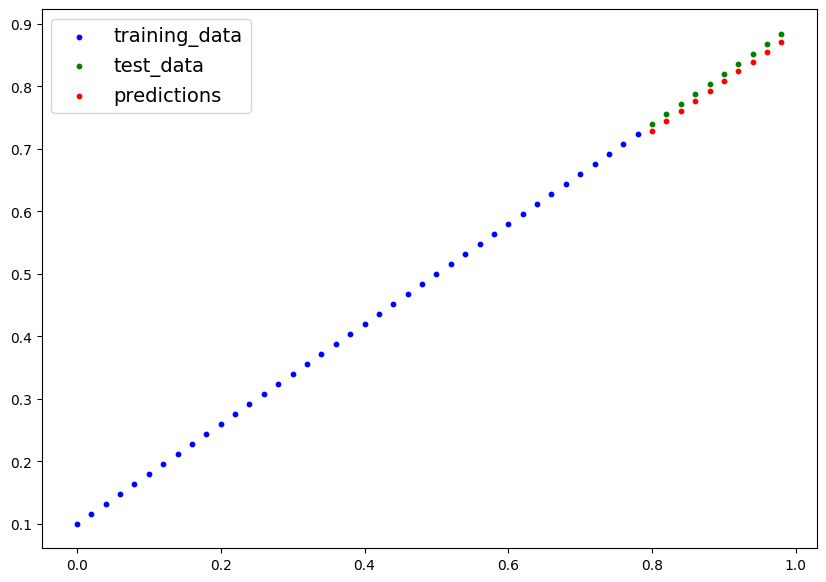

In [66]:
 plot_data(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_data(predictions=y_preds.cpu())